**Name: Ali Furkan Kalay**

**ID: 45625365**

In [1]:
import numpy as np
from scipy import optimize
import matplotlib.pyplot as plt

## Question 1

The function takes 5 arguments with 2 default values. `F` is the function set, `DF` is the Jacobian matrix of given function and `X` is the initial value. Iteration number and tolerance can be adjusted if required. 

In [2]:
def newton_rapson(F, DF, X, max_iteration = 100, tolerance = 1e-5):
    for i in range(max_iteration):
        dx = np.linalg.solve(DF(X), F(X))
        X = X - dx
        print(X)
        if np.absolute(dx).sum()<tolerance:
            break

#### Example 1

Suppose we have the following function defined below:

$$
f(x) = \begin{cases}
f_1(x) = x_2^2 - 2x_1 + x_2^2 - x_3 + 1\\
f_2(x) = x_1x_2^2- x_1 -3x_2+x_2x_3+2\\
f_3(x) = x_1x_3^2-3x_3+x_2x_3^2+x_1x_2
\end{cases}
$$

In [3]:
def f1(X):
    f_1 = X[0]**2 - 2 * X[0] + X[1] ** 2 - X[2] + 1
    f_2 = X[0] * X[1] ** 2 - X[0] - 3 * X[1] + X[1] * X[2] + 2
    f_3 = X[0] * X[2] ** 2 - 3 * X[2] + X[1] * X[2] ** 2 + X[0] * X[1]
    return np.array([f_1,f_2,f_3])

The Jacobian matrix of given function set:

$$
J(x) = \begin{bmatrix}2x_1-2&2x_2&-1\\
x_2^2 - 1& 2x_1x_2-3+x_3&x_2\\
x_3^2+x_2&x_3^2+x_1& 2x_1x_3-3+2x_2x_3
\end{bmatrix}
$$

In [4]:
def df1(X):
    df_1 = np.array([2 * X[0] - 2, 2 * X[1], -1])
    df_2 = np.array([X[1]**2 - 1, 2 * X[0] * X[1] - 3 + X[2], X[1]])
    df_3 = np.array([X[2]**2 + X[1], X[2]**2 + X[0], 2 * X[0]* X[2] - 3 + 2 * X[1] * X[2]])
    return np.array([df_1, df_2, df_3])

With initial points $(3,3,3)$:

In [5]:
newton_rapson(f1, df1, [3,3,3])

[0.90243902 2.6097561  2.26829268]
[0.93521491 1.6218234  1.65742298]
[0.76161568 1.23552297 1.40397937]
[1.06832127 1.04639128 0.9697634 ]
[0.9880828  1.0072448  1.00671344]
[0.99994661 1.00006051 0.99992866]
[1.00000001 1.         0.99999999]
[1. 1. 1.]


So the solution is $x^* = (1,1,1)$. 

#### Example 2

Suppose we have the following function defined below:

$$
f(x) = \begin{cases}
f_1(x) = 3x_1-cos(x_2x_3) - 3/2\\
f_2(x) = 4x_1^2-625x_2^2+2x_3-1\\
f_3(x) = 20x_3+e^{-x_1x_2}+9
\end{cases}
$$

In [6]:
def f2(x):
    f_1 = 3 * x[0]-np.cos(x[1] * x[2]) - 3/2
    f_2 = 4 * x[0] ** 2 - 625 * x[1] ** 2 + 2 * x[2] - 1
    f_3 = 20 * x[2] + np.e ** (-1 * x[0] * x[1]) + 9 
    return np.array([f_1,f_2,f_3])

The Jacobian matrix of given function set:

$$
J(x) = \begin{bmatrix}3 & x_3 sin(x_2x_3) & x_2 sin(x_2x_3)\\
8x_1 & - 1250 x_2 & 2 \\
-x_2e^{-x_1x_2} & -x_1e^{-x_1x_2} & 20
\end{bmatrix}
$$

In [7]:
def df2(x):
    df_1 = np.array([3, x[2] * np.sin(x[1]*x[2]),x[1] * np.sin(x[1]*x[2])])
    df_2 = np.array([8 * x[0], -1250 * x[1], 2])
    df_3 = np.array([-1 * x[1] * (np.e ** (-1 * x[0] * x[1])), -1 * x[0] * (np.e ** (-1 * x[0] * x[1])), 20])
    return np.array([df_1, df_2, df_3])

Again with the initial point $x=(3,3,3)$:

In [8]:
newton_rapson(f2, df2, [3,3,3])

[ 2.23456756  1.50419454 -0.45004803]
[ 0.82825601  0.74832995 -0.45833389]
[ 0.8308481   0.37501045 -0.4851685 ]
[ 0.83310886  0.18919433 -0.49223627]
[ 0.83325981  0.0979181  -0.49595522]
[ 0.83327919  0.05534792 -0.49771698]
[ 0.83328142  0.03895727 -0.49839847]
[ 0.83328161  0.03550334 -0.49854225]
[ 0.83328161  0.03533502 -0.49854926]
[ 0.83328161  0.03533462 -0.49854928]


Solution is $x^* = (0.83328161, 0.03533462, -0.49854928)$

*Test functions are taken from [http://fourier.eng.hmc.edu/e176/lectures/NM/node21.html] in order to compare results.*

## Question 2

Let's use the Bisection method to find the optimal saving rate. I use the function that we used in the lecture with sligh modifications instead of `scipy.optimize.bisect` to better observe the number of iterations. 

In [9]:
def bisection(f,a,b,e, xtol = 1e-6, ftol = 1e-6, print_int = True):
    L,U = a,b
    fL, fU = f(L, e), f(U, e)
    i_iter = 0
    max_iter = 100
    while i_iter<=max_iter:
        if i_iter == 0:
            if fL == 0:
                M = L
                break
        i_iter += 1
        M = 0.5*(L+U)
        fM = f(M, e)

        if fM*fL<0:
            U, fU = M, fM
        else:
            L, fL = M, fM
        
        if print_int:
            print('Iteration step = ' + str(i_iter) + ', midpoint = ' + str(M))
            
        if U-L <xtol*(1.0+abs(L)+abs(U)) or abs(fM)<ftol:
            break

    if i_iter == max_iter:
        print('Max. number of iteration reached. A solution may not be accurate.')
            
    return M, i_iter

The optimal saving function is: 

$$ 0 = \beta E _1 \dfrac{u'(Y_2+(1+R_2)x)}{u'(Y_1-x)} (1+R_2) - 1 $$ 

We have the $R_2 = Y_2 = 0 $ and $\beta  = Y_1 = 1$, so: 

$$ 0 = E _1 \dfrac{u'(Y_2+x)}{u'(1-x)} - 1 $$ 

Since $u'(x) = 1/x$ and $Y_2 = 0$ with probability $\epsilon $ and $Y_2 = 1/(1-\epsilon )$ with probability $1-\epsilon$ we have the following expected value: 

$$ \epsilon (1-x) (1+x -\epsilon x) + x (1-x) (1-\epsilon )^2 - x (1+x -\epsilon) = 0 $$

So `pythonic` expression of the solution is:

In [10]:
def saving_func(x, e):
    return e * (1-x) * (1 + x - e * x) + x * (1-x)*(1-e)**2 - x * (1 + x - e * x)

We define the epsilon grid from 0 to 0.9:

In [11]:
epsilons = np.linspace(0,0.9, num = 91)

Solutions for all given epsilons are:

In [12]:
points1 = np.array([bisection(saving_func, 0 , 1, e = i, print_int = False) for i in epsilons])

Total number of iterations for 91 optimization is:

In [13]:
print(points1[:,1].sum())

1625.0


The convergence points and the epsilons plotted below:

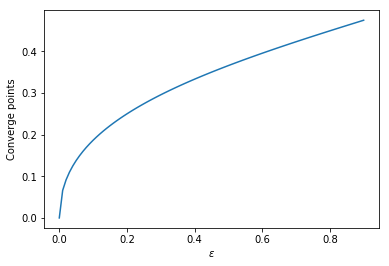

In [14]:
plt.plot(epsilons, points1[:,0])
plt.xlabel('$\epsilon $')
plt.ylabel('Converge points')
plt.show()

Now in order to converge faster, I will use Newton-Raphson method that we used in question one. I slightly change the codes used in the lecture instead of using `scipy.optimize.newton` to better observe number of iterations:

In [15]:
def NRmethod(f,g,x0,e, xtol=1e-6, ftol=1e-6, max_iter=1000):
    x, fx, gx = x0, f(x0,e), g(x0,e)
    i_iter = 0
    while i_iter<=max_iter:
        i_iter += 1
        dx = - fx/gx
        xp = x +dx
        if abs(dx) <= xtol:
            x, fx = xp, f(xp,e)        
            break
        x, fx, gx = xp, f(xp,e), g(xp,e)
    if i_iter == max_iter:
        print('Max. number of iteration reached. A solution may not be accurate.')
        return x, i_iter
    elif abs(fx)<=ftol: 
        return x, i_iter
    else:
        print('Newton-Raphson method failed to find a solution.')
        return x, i_iter


Derivative of the target function (`saving_func`):

In [16]:
def d_saving_func(x, e):
    return (-1-e) * (1 + x - e * x) + e * (1 - x) * (1 - e) - x * (1-e) ** 2 - x * (1-e) + (1-x) * (1-e)**2 

Solution with newton method:

In [17]:
points2 = np.array([NRmethod(saving_func,d_saving_func,x0=0.1, e = i) for i in epsilons])

Total number of iterations are substatially reduced:

In [18]:
print(points2[:,1].sum())

422.0


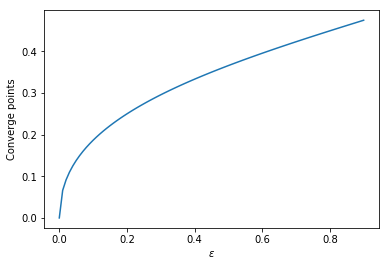

In [19]:
plt.plot(epsilons, points2[:,0])
plt.xlabel('$\epsilon $')
plt.ylabel('Converge points')
plt.show()

In addition to that I will update the initial values with the latest solution. There is not too much difference between $\epsilon _n $ and $\epsilon _{n+1} $. Therefore their solutions must be relatively close to each other. I will use the same initial value $0.1$ for the first iteration, however it will be updated for each iteration:

In [20]:
points3 = np.empty_like(points2)
for i in range(len(epsilons)):
    if i == 0:
        points3[i] = NRmethod(saving_func, d_saving_func, x0 = 0.1, e = epsilons[i])
    else:
        points3[i] = NRmethod(saving_func, d_saving_func, x0 = points3[i-1,0], e = epsilons[i])

Total number of iterations are reduced from 422 to:

In [21]:
print(points3[:,1].sum())

289.0


We obtain the same solution:

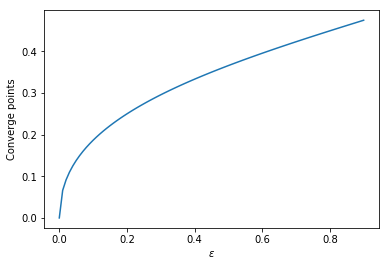

In [22]:
plt.plot(epsilons, points3[:,0])
plt.xlabel('$\epsilon $')
plt.ylabel('Converge points')
plt.show()

## Question 3

Let's define the function and derivative functions:

In [23]:
def f_with_cases(x):
    if x >= 1:
        return np.log(x)
    else:
        return 0.5 * (x ** 2 - 1)

In [24]:
def D_f_with_cases(x):
    if x >= 1:
        return 1/x
    else:
        return x

I define the iteration function for $x_n$ and $a_n$:

In [25]:
def iteration_func(p = -1, max_iter = 30):
    a_list = [1/(2 ** (i+1)) for i in range(max_iter) ]
    x_list = [2]
    for n in range(max_iter):
        x = x_list[n] + a_list[n] * p
        x_list.append(x)
    return np.array(x_list), np.array(a_list)

We have the samples for given iterations. I limited the `max_iter=30` otherwise Python rounds numbers to 1 after some iterations. We have our series:

In [26]:
x_s , a_s = iteration_func()

#### (1) $x_n \in (1,2]$

In [27]:
(2>= x_s).all() and (x_s > 1).all()

True

#### (2) $x_n \rightarrow 1$ as $n \rightarrow \infty$

We can observe that $x_n \rightarrow 1$ from the plot below:

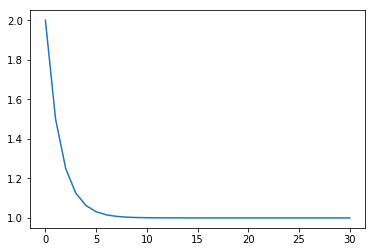

In [28]:
plt.plot(x_s)
plt.show()

The last number in the iteration is substatially close to 1 for $n=30$:

In [29]:
print(x_s[-1])

1.0000000009313226


In fact if we increase `max_iter` to a sufficiently large number python rounds $x_n$ to 1 because it is very small:

In [30]:
print(iteration_func(max_iter = 1000)[0][-1])

1.0


#### (3) The first Wolfe condition is satisfied for all $n$:

$$
f(x_n + a_np_n) \leq f(x_n) + c_1a_np_n' \bigtriangledown f(x_n)
$$

This condition forbids steps that are too long. If it is not satisfied than gradient descent will diverge or will not converge. Usually $c_1$ is choosen as a very small number, e.g. $10^{-4}$. The quantity  $a_np_n' \bigtriangledown f(x_n)$ is the decrease in f predicted by the slope of $f$ at $x_n$ in the direction of $p_n$ which is negative. 

In our case Wolfe condition is satisfied for all $c_1 \in (0,1)$. If we set a random variable for $c_1$ we have:

In [31]:
c1 = np.random.rand()
lhs = lambda i: f_with_cases(x_s[i]-a_s[i]) #LHS of the condition
rhs = lambda i: f_with_cases(x_s[i]) - a_s[i] * c1 * D_f_with_cases(x_s[i]) #RHS of the condition
print(np.array([lhs(i) <= rhs(i) for i in range(30)]).all()) # Checking it if holds for all n

True


Even though the first Wolfe condition is satisfied we cannot find the minimum, in fact not even a local minimum. Let's see how does this function looks like for $x\in [-5,5]$:

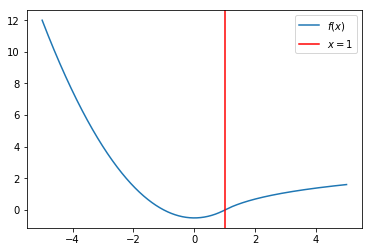

In [32]:
x5_5 = np.linspace(-5,5,1000) 
f5_5 = np.array([f_with_cases(i) for i in x5_5])
# Plotting
fig, ax = plt.subplots()
line1, = ax.plot(x5_5, f5_5, label = ('$f(x)$'))
line2 = ax.axvline(x=1, color='red', label='$x=1$')
plt.legend()
plt.show()

Therefore second Wolfe Condition is not satisfied: 

$$
p_n'\bigtriangledown f(x_n+a_np_n)\ge c_2 p_n'\bigtriangledown f(x_n) \qquad c_2 \in (c_1,1)
$$

The second Wolfe condition ensures that our steps are not too short, but in our case our steps are too short we cannot converge to the optimum as seen in the plot above. We can easly observe that the minimum is (or around) 0 but our steps are too small that we stop at $x=1$. Let's see that these conditions are not satisfied:

In [33]:
c2 = np.random.uniform(c1,1)
lhs = lambda i: -D_f_with_cases(x_s[i]-a_s[i])
rhs = lambda i: -c2 * D_f_with_cases(x_s[i])
print(np.array([lhs(i) >= rhs(i) for i in range(30)]).all()) # IT does not hold for all n

False


Let's try for many possible $c_2\in(0,1)$:

In [34]:
wolfe_2 = []
for k in np.linspace(0,1,1000):
    c2 = k
    wolfe_2.append(np.array([lhs(i) >= rhs(i) for i in range(30)]).all()) # Check if it holds for all n given c_2
wolfe_2 = np.array(wolfe_2)
print(wolfe_2.any()) # Checking condition holds for any c_2

False


No matter how we choose $c_2 \in (0,1)$ the second condition does not hold. So it must be that $x_0+a_0p_0 = x_1 <1$ and therefore we can write the analical solution: $\bigtriangledown f(x_1)=x_1$. The maximum value $x_1 = x_0 + a_0 p_0$ depends on:

$$
-\bigtriangledown f(x_1)\ge -c_2 \bigtriangledown f(x_0)\\
-x_1 \ge -\dfrac{c_2}{x_0} = -\dfrac{c_2}{2}
$$

Consequently the maximum value $x_1 = x_0 + a_0p_0$ can take is $\dfrac{c_2}{2}$. Usually the $c_2$ value is close to 1(e.g. 0.9). In order to converge, we need to set the steps ($a_n$) accordingly so the second condition holds for all $n$. 

*I refer to the following sources for my explanations:*

- http://pages.mtu.edu/~msgocken/ma5630spring2003/lectures/lines/lines/node3.html
- https://en.wikipedia.org/wiki/Wolfe_conditions

## Question 4

I define the function, derivatives, and constraints:

In [35]:
sign = -1.0 # We convert argmin problem to argmax...
def profit(x, sign=sign):
    return sign * ( 0.5 * (x[0] - x[1]**2) + 0.5 * (x[2] - x[3]**2))

def D_profit(x, sign=sign):
    dfdx0 = sign * 0.5
    dfdx1 = sign * (-1) * x[1]
    dfdx2 = sign * 0.5
    dfdx3 = sign * (-1) * x[3]
    return np.array([ dfdx0, dfdx1, dfdx2, dfdx3])

In [36]:
# The given parameters:
thetaH = 2
thetaL = 1
uH = 0
uL = 0
initials = [1.0,1.0,1.0,1.0]

# Constraints with their derivatives
irc_1 = lambda x: np.array([thetaH * x[1]-x[0]-uH]) # The first individual rationality constraint
irc_2 = lambda x: np.array([thetaL * x[3]-x[2]-uL]) # The second individual rationality constraint
icc_1 = lambda x: np.array([thetaH * x[1]-x[0]-thetaH * x[3]+x[2]]) # The first incentive compatibility constraint
icc_2 = lambda x: np.array([thetaL * x[3]-x[2]-thetaL * x[1]+x[0]]) # The second incentive compatibility constraint

cons = ({'type': 'ineq',
         'fun' : irc_1,
         'jac' : lambda x: np.array([-1, thetaH, 0 , 0])},
        {'type': 'ineq',
         'fun' : irc_2,
         'jac' : lambda x: np.array([0,0,-1,thetaL])},
        {'type': 'ineq',
         'fun' : icc_1, 
         'jac' : lambda x: np.array([-1,thetaH,1,-thetaH])},
        {'type': 'ineq',
         'fun' : icc_2, 
         'jac' : lambda x: np.array([1, -thetaL, -1, thetaL ])})

# I am going to set the boundries for prices and quantities as 'non-negative'
   # Using 'None' for upper bounds sometimes give error messages.
   # Therefore I am using sufficiently high value for bounds: 1e6

bnds = ((0, 1e6), (0, 1e6),(0, 1e6),(0, 1e6))

In [37]:
res1 = optimize.minimize(profit, x0=initials, 
                        jac=D_profit, 
                        method='SLSQP', 
                        constraints = cons,
                        bounds = bnds,
                        options={'disp': True})

print('-----')
print(res1)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.4999997100186543
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6
-----
     fun: -0.4999997100186543
     jac: array([-0.5       ,  0.99923845, -0.5       ,  0.        ])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([1.99847689, 0.99923845, 0.        , 0.        ])


So the solution ($p_H^*,q_H^*,p_L^*, q_L^*$)is:

In [38]:
print(res1.x)

[1.99847689 0.99923845 0.         0.        ]


Therefore we have a *seperating* solution. Note that solition does not converge perfectly.

Let's see which constraints are binding. I define a function to observe the constraints. Instead of checking if constraint are equal to 0, I check if they are less than a arbirarly small number, `tol`. Because solutions do not converge perfectly as seen above.

In [39]:
def constraint_check(x, tol = 1e-6):
    print('The first individual rationality constraint is', end=' ')
    if irc_1(x) < tol:
        print('binding.')
    else:
        print('NOT binding.')
    print('The second individual rationality constraint is', end=' ')
    if irc_2(x) < tol:
        print('binding.')
    else:
        print('NOT binding.')
    print('The first incentive compatibility constraint is', end=' ')
    if icc_1(x)< tol:
        print('binding.')
    else:
        print('NOT binding.')
    print('The second incentive compatibility constraint is', end=' ')
    if icc_2(x) < tol:
        print('binding.')
    else:
        print('NOT binding.')

In [40]:
constraint_check(res1.x)

The first individual rationality constraint is binding.
The second individual rationality constraint is binding.
The first incentive compatibility constraint is binding.
The second incentive compatibility constraint is NOT binding.


Let's change the $\theta _H$ as follows:

In [41]:
thetaH = 1.5
res2 = optimize.minimize(profit, x0=initials, 
                        jac=D_profit, 
                        method='SLSQP', 
                        constraints = cons,
                        bounds = bnds,
                        options={'disp': True})

print('-----')
print(res2)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.3124999908608319
            Iterations: 5
            Function evaluations: 5
            Gradient evaluations: 5
-----
     fun: -0.3124999908608319
     jac: array([-0.5       ,  0.74993139, -0.5       ,  0.2498835 ])
 message: 'Optimization terminated successfully.'
    nfev: 5
     nit: 5
    njev: 5
  status: 0
 success: True
       x: array([0.99995533, 0.74993139, 0.2498835 , 0.2498835 ])


Solution ($p_H^*,q_H^*,p_L^*, q_L^*$) is again *seperating*. When we decreased the $\theta _H$ firm starts to produce lower quality products and decrease both quantity and price of higher quality products. Constraints are:

In [42]:
constraint_check(res2.x)

The first individual rationality constraint is NOT binding.
The second individual rationality constraint is binding.
The first incentive compatibility constraint is binding.
The second incentive compatibility constraint is NOT binding.


Let's change $\theta _H$ as follows:

In [43]:
thetaH = 3
res3 = optimize.minimize(profit, x0=initials, 
                        jac=D_profit, 
                        method='SLSQP', 
                        constraints = cons,
                        bounds = bnds,
                        options={'disp': True})

print('-----')
print(res3)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -1.1249999999999991
            Iterations: 6
            Function evaluations: 6
            Gradient evaluations: 6
-----
     fun: -1.1249999999999991
     jac: array([-5.00000000e-01,  1.50000000e+00, -5.00000000e-01,  7.07767178e-16])
 message: 'Optimization terminated successfully.'
    nfev: 6
     nit: 6
    njev: 6
  status: 0
 success: True
       x: array([4.50000000e+00, 1.50000000e+00, 4.04295073e-16, 7.07767178e-16])


Solution ($p_H^*,q_H^*,p_L^*, q_L^*$) is again *seperating*. Instead when we increase the $\theta _H $ the firm does not produce lower quality products and increases the both quantity and price of high quality. Constraints are:

In [44]:
constraint_check(res3.x)

The first individual rationality constraint is binding.
The second individual rationality constraint is binding.
The first incentive compatibility constraint is binding.
The second incentive compatibility constraint is NOT binding.


Let's make $U_H=0.5$:

In [45]:
thetaH = 2 # Back to the default value
uH = 0.5
res4 = optimize.minimize(profit, x0=initials, 
                        jac=D_profit, 
                        method='SLSQP', 
                        constraints = cons,
                        bounds = bnds,
                        options={'disp': True})

print('-----')
print(res4)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.3749996172264677
            Iterations: 7
            Function evaluations: 7
            Gradient evaluations: 7
-----
     fun: -0.3749996172264677
     jac: array([-0.5       ,  1.00075187, -0.5       ,  0.49955252])
 message: 'Optimization terminated successfully.'
    nfev: 7
     nit: 7
    njev: 7
  status: 0
 success: True
       x: array([1.50150374, 1.00075187, 0.49955252, 0.49955252])


Solution ($p_H^*,q_H^*,p_L^*, q_L^*$) is again *seperating*. It is again very intutitive. Because when we set $U_H$ greater than 0, then means customers with high quality preference has (in a way) alternatives. Therefore firm decreases the high quality products' price, and starts producing low quality goods. Constraints are:

In [46]:
constraint_check(res4.x)

The first individual rationality constraint is binding.
The second individual rationality constraint is binding.
The first incentive compatibility constraint is NOT binding.
The second incentive compatibility constraint is NOT binding.


Let's increase the gap more:

In [47]:
uH = 1
res5 = optimize.minimize(profit, x0=initials, 
                        jac=D_profit, 
                        method='SLSQP', 
                        constraints = cons,
                        bounds = bnds,
                        options={'disp': True})

print('-----')
print(res5)

Optimization terminated successfully.    (Exit mode 0)
            Current function value: -0.12500000000000017
            Iterations: 3
            Function evaluations: 3
            Gradient evaluations: 3
-----
     fun: -0.12500000000000017
     jac: array([-0.5,  1. , -0.5,  0.5])
 message: 'Optimization terminated successfully.'
    nfev: 3
     nit: 3
    njev: 3
  status: 0
 success: True
       x: array([1. , 1. , 0.5, 0.5])


Solution ($p_H^*,q_H^*,p_L^*, q_L^*$) is again *seperating*. With further gap, company decreases the prices even more. Constraints are:

In [48]:
constraint_check(res5.x)

The first individual rationality constraint is binding.
The second individual rationality constraint is binding.
The first incentive compatibility constraint is NOT binding.
The second incentive compatibility constraint is binding.
